# Gradient Boosted Trees

Gradient Boosted Trees use decision trees as estimators. It can work with different loss functions (regression, classification, risk modelling etc.), evaluate it's gradient and approximates it with a simple tree (stage-wisely, that minimizes the overall error).

AdaBoost is a special case of Gradient Boosted Tree that uses exponential loss function.

The Algorithm:

Calculate the average of the label column as initially this average shall minimise the total error.

Calculate the pseudo residuals. Pseudo residual actual label- the predicted result (which is average in the first iteration) Mathematically, derivative of the pseudo residual=(y/(x) f(x))

where, L is the loss function.

Here, the gradient of the error term is getting calculated as the goal is to minimize the error. Hence the name gradient boosted trees create a tree to predict the pseudo residuals instead of a tree to predict for the actual column values.

new result previous result+learning rate residual Mathematically, F(x) = F(x) + ΣΥ where v is the leaming rate and y is the residual

Repeat these steps until the residual stops decreasing

# Gradient Boosted Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# just find correlation of feature vs target using corrwith
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

# visualize the correlation

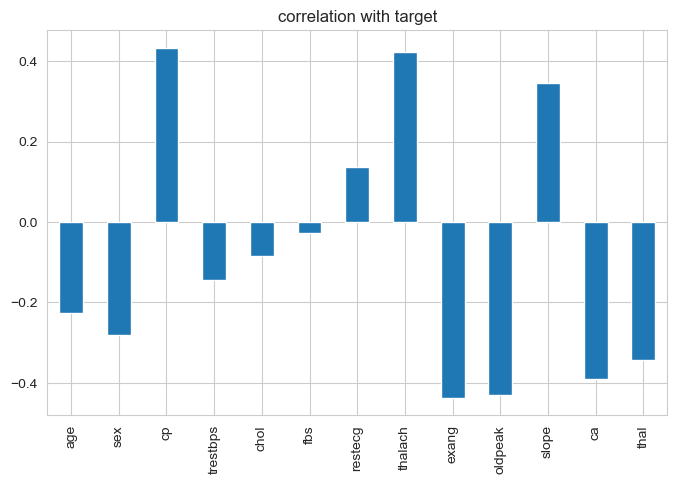

In [7]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(8,5),title='correlation with target')
plt.show()

### Let's work on feature selection and see if that can help us building better model.

# Model building using SelectPercentile features


When we apply chi2, we get p-values for all features. Based on the p-values, it will select top 80% of features.

Example - If p-value < 0.05, it will reject null hypothesis. Default null hypothesis is, there is no relation b/w feature and target

In [8]:
from sklearn.feature_selection import SelectPercentile,chi2

In [9]:
# instantiate selectpercentile and fit(feature,label)
X=df.drop(['target'],axis=1)
y=df.target

Spercentile=SelectPercentile(score_func=chi2,percentile=80)
Spercentile=Spercentile.fit(X,y)

In [10]:
# seperate the feature to check p-values
cols=Spercentile.get_support(indices=True)
print('Feature index=',cols)

features=X.columns[cols]
print('Features=',list(features))

Feature index= [ 0  1  2  3  4  7  8  9 10 11]
Features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [11]:
df_scores=pd.DataFrame({'features':X.columns,'Chi2Score':Spercentile.scores_,'pValue':Spercentile.pvalues_})
df_scores.sort_values(by='Chi2Score',ascending=True)

,features,Chi2Score,pValue
5,fbs,0.202934,6.523632e-01
6,restecg,2.978271,8.438939e-02
12,thal,5.791853,1.610061e-02
1,sex,7.576835,5.912318e-03
10,slope,9.804095,1.741237e-03
3,trestbps,14.823925,1.180286e-04
0,age,23.286624,1.395673e-06
4,chol,23.936394,9.957148e-07
8,exang,38.914377,4.428074e-10
2,cp,62.598098,2.534982e-15


In [12]:
# create subset of selected features
X=df[features]
y=df.target

In [13]:
# import libs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.3,random_state=42)

# GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report,accuracy_score

In [15]:
# write one function and call as many as times to check accuracy score of different models
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    
    if train:
        y_pred =clf.predict(x_train)
        print(" Train Result ")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")

    elif train==False:
        pred=clf.predict(x_test)

        print("\n==========Test Result==========")
        print(f"accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%") 
        print ("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2)) # Model confidence/accuracy


In [16]:
# initiate GradientBoostingClassifier
gbdt_clf=GradientBoostingClassifier()
# train the model
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [17]:
# call the function and pass dataset to check train and test score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

 Train Result 
Accuracy Score: 100.00%

==========Test Result==========
accuracy Score: 83.52%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# lets try if we can improve the performance of our model using parameter tuning

# hyperparameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_param={
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
    'n_estimators': range(20,100,10),
    'learning_rate':np.arange(0.1,0.3)
}

In [20]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': range(20, 100, 10)})

In [21]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

In [22]:
gbdt_clf=GradientBoostingClassifier(
    max_depth=4,min_samples_split=2,n_estimators=30,learning_rate=0.1
)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=30)

In [23]:
# call the function and pass dataset to check train and test score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

 Train Result 
Accuracy Score: 98.58%

==========Test Result==========
accuracy Score: 84.62%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



# you can still tune the parameter with different range and try to improve the score